In [2]:
!pip install twitterscraper
!pip install wordcloud

  Stored in directory: /home/nbuser/.cache/pip/wheels/45/50/9b/70128bca07e2bf8b5ed3f504002e9e74a6eaa5e756341b6931
  Stored in directory: /home/nbuser/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built twitterscraper bs4
    100% |████████████████████████████████| 368kB 14.1MB/s ta 0:00:01


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import nltk
from nltk import bigrams 
import  datetime as dt
from collections import Counter 
%matplotlib inline
from twitterscraper import query_tweets
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from textblob import Word
from textblob.sentiments import NaiveBayesAnalyzer

In [4]:
#fetching tweet data using twitterscraper
def fetch_tweets():
    list_of_tweets = query_tweets("#DateMyFamilyZambia", 1000, begindate=dt.date(2019, 1, 1), enddate=dt.date(2019,4,10))
    tweets_dicts=[]
    for tweet in list_of_tweets:
        tweetObj={'likes':tweet.likes,'replies':tweet.replies,'text':tweet.text,'user':tweet.user,'timestamp':tweet.timestamp,'retweets':tweet.retweets}
        tweets_dicts.append(tweetObj)
    df = pd.DataFrame(tweets_dicts)
    return df


df=fetch_tweets()
writer = pd.ExcelWriter('DateMyFamilyZambia.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

INFO: queries: ['#DateMyFamilyZambia since:2019-01-01 until:2019-01-05', '#DateMyFamilyZambia since:2019-01-05 until:2019-01-10', '#DateMyFamilyZambia since:2019-01-10 until:2019-01-15', '#DateMyFamilyZambia since:2019-01-15 until:2019-01-20', '#DateMyFamilyZambia since:2019-01-20 until:2019-01-25', '#DateMyFamilyZambia since:2019-01-25 until:2019-01-30', '#DateMyFamilyZambia since:2019-01-30 until:2019-02-04', '#DateMyFamilyZambia since:2019-02-04 until:2019-02-09', '#DateMyFamilyZambia since:2019-02-09 until:2019-02-14', '#DateMyFamilyZambia since:2019-02-14 until:2019-02-19', '#DateMyFamilyZambia since:2019-02-19 until:2019-02-24', '#DateMyFamilyZambia since:2019-02-24 until:2019-03-01', '#DateMyFamilyZambia since:2019-03-01 until:2019-03-06', '#DateMyFamilyZambia since:2019-03-06 until:2019-03-11', '#DateMyFamilyZambia since:2019-03-11 until:2019-03-16', '#DateMyFamilyZambia since:2019-03-16 until:2019-03-21', '#DateMyFamilyZambia since:2019-03-21 until:2019-03-26', '#DateMyFamilyZ

In [5]:
df

,likes,replies,retweets,text,timestamp,user
0,0,0,0,the differences between #datemyfamilyzambia an...,2019-01-09 17:27:47,preciouschanda3
1,2,1,0,She didn’t pick Mwayi?? Whaaaat?!!!! #DateMyFa...,2019-01-06 17:51:08,HoneyJewel9
2,0,0,0,I still can't get over wow wow wow wow ...cute...,2019-01-06 17:13:10,lenganjiposts
3,0,0,0,Catching the repeat of #datemyfamilyZambia,2019-01-05 13:10:44,ToxiqOfficial
4,0,0,0,I am so over #DatemyFamilyZambia.The whole thi...,2019-01-05 11:37:38,Kayjerom
5,0,0,0,So I'm a Mum and I am basically lame and total...,2019-01-05 06:37:56,Idylic_Lonsome
6,0,0,0,"Ba Nathan ati ""you have missed out on a chance...",2019-01-05 06:37:56,Idylic_Lonsome
7,8,1,0,I'm sorry this when I'm finally getting the ch...,2019-02-13 17:21:53,Happy_human21
8,5,1,1,In this economy the best you can do is stay ho...,2019-02-13 11:27:32,katlegojakes
9,0,0,0,Shout out to Joe's honesty over his very own b...,2019-02-12 16:40:22,chabs_cc


In [17]:
#Lets rename df to twdata
twdata=df

In [19]:
#Cleaning data
twdata['time_date']=pd.to_datetime(twdata['timestamp'])
twdata['date'] = [d.date() for d in twdata['time_date']]
twdata['time'] = [d.time() for d in twdata['time_date']]
twdata['hour']= twdata.time_date.dt.hour
twdata

,likes,replies,retweets,text,timestamp,user,time_date,date,time,hour
0,0,0,0,the differences between #datemyfamilyzambia an...,2019-01-09 17:27:47,preciouschanda3,2019-01-09 17:27:47,2019-01-09,17:27:47,17
1,2,1,0,She didn’t pick Mwayi?? Whaaaat?!!!! #DateMyFa...,2019-01-06 17:51:08,HoneyJewel9,2019-01-06 17:51:08,2019-01-06,17:51:08,17
2,0,0,0,I still can't get over wow wow wow wow ...cute...,2019-01-06 17:13:10,lenganjiposts,2019-01-06 17:13:10,2019-01-06,17:13:10,17
3,0,0,0,Catching the repeat of #datemyfamilyZambia,2019-01-05 13:10:44,ToxiqOfficial,2019-01-05 13:10:44,2019-01-05,13:10:44,13
4,0,0,0,I am so over #DatemyFamilyZambia.The whole thi...,2019-01-05 11:37:38,Kayjerom,2019-01-05 11:37:38,2019-01-05,11:37:38,11
5,0,0,0,So I'm a Mum and I am basically lame and total...,2019-01-05 06:37:56,Idylic_Lonsome,2019-01-05 06:37:56,2019-01-05,06:37:56,6
6,0,0,0,"Ba Nathan ati ""you have missed out on a chance...",2019-01-05 06:37:56,Idylic_Lonsome,2019-01-05 06:37:56,2019-01-05,06:37:56,6
7,8,1,0,I'm sorry this when I'm finally getting the ch...,2019-02-13 17:21:53,Happy_human21,2019-02-13 17:21:53,2019-02-13,17:21:53,17
8,5,1,1,In this economy the best you can do is stay ho...,2019-02-13 11:27:32,katlegojakes,2019-02-13 11:27:32,2019-02-13,11:27:32,11
9,0,0,0,Shout out to Joe's honesty over his very own b...,2019-02-12 16:40:22,chabs_cc,2019-02-12 16:40:22,2019-02-12,16:40:22,16


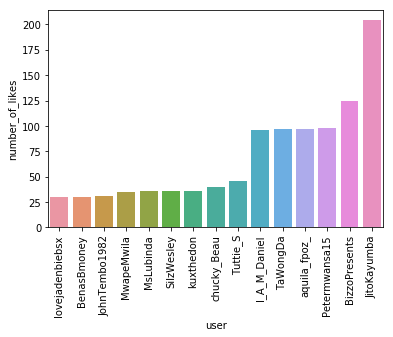

In [20]:
#Finding the most influencial Tweeter
def convert_index_most_liked(tweep_most_likes_df):
    index_list=np.array(tweep_most_likes_df.index)
    tweeps=[]
    for index,user_from_index  in enumerate (index_list):
        total_likes=tweep_most_likes_df['likes'][index]
        likes_per_user={'user':user_from_index,'number_of_likes':total_likes}
        tweeps.append(likes_per_user)
    return tweeps

tweep_group=twdata.groupby('user')
tweep_most_likes=tweep_group['likes'].sum()
tweep_most_likes_df_temp=pd.DataFrame(tweep_most_likes)
tweep_most_likes_df=pd.DataFrame(tweep_most_likes_df_temp['likes'])
temp=convert_index_most_liked(tweep_most_likes_df)
most_likes_df=pd.DataFrame(temp)
most_liked_tweets=most_likes_df.sort_values(by='number_of_likes')

g = sns.barplot(x='user',y='number_of_likes',data=most_liked_tweets.tail(15))
for item in g.get_xticklabels():
    item.set_rotation(90)

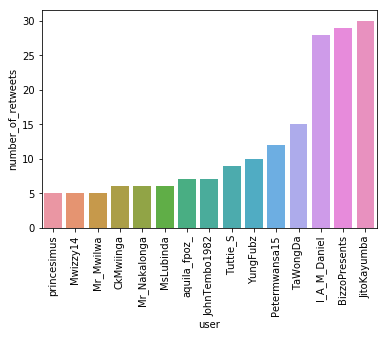

In [27]:
#finding the tweep with the most retweets
most_retweeted_tweeps_sum=twdata.groupby('user')['retweets'].sum()
temp=pd.DataFrame(most_retweeted_tweeps_sum)
                  
def convert_index_most_retweeted(tweep_most_retweeted_df):
    index_list=np.array(tweep_most_likes_df.index)
    tweeps=[]
    for index,user_from_index  in enumerate (index_list):
        total_retweets=tweep_most_retweeted_df['retweets'][index]
        retweets_per_user={'user':user_from_index,'number_of_retweets':total_retweets}
        tweeps.append(retweets_per_user)
    return pd.DataFrame(tweeps)
most_retweeted_tweeps_df=convert_index_most_retweeted(temp)
most_retweeted_tweeps_sorted=most_retweeted_tweeps_df.sort_values(by='number_of_retweets')

#render the bar graph
g=sns.barplot(x='user',y='number_of_retweets',data=most_retweeted_tweeps_sorted.tail(15))
for item in g.get_xticklabels():
    item.set_rotation(90)

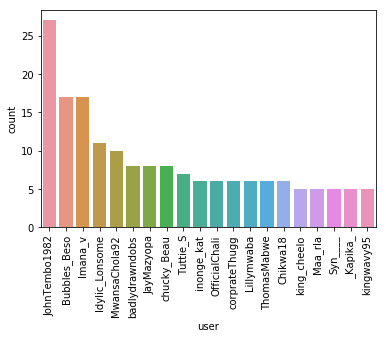

In [16]:
#Who tweeted the Most about the Show?
g=sns.countplot(x='user',data=twdata, order=pd.value_counts(twdata['user']).iloc[:20].index)
for item in g.get_xticklabels():
    item.set_rotation(90)

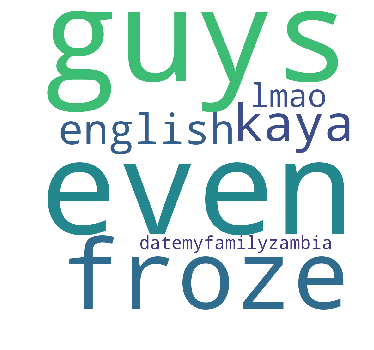

In [45]:
#We will be appending the words to this var
comment_words = ' ' 

#Finds all stop words in the set of tweets.
stopwords = set(STOPWORDS) 

 #convert all tweet content into strings
for val in df.text:
   val = str(val)
#Split all strings into individual components
   tokens = val.split() 
   for i in range(len(tokens)):
#Converts all the individual strings to lower case.
      tokens[i] = tokens[i].lower() 
for words in tokens:
   comment_words = comment_words + words + ' '
wordcloud=WordCloud(width=1000,height=1000, background_color='white', stopwords=stopwords,min_font_size=10).generate(comment_words)

#All of this is a single line
plt.figure(figsize=(5,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [24]:
data_set=twdata

In [25]:
text = data_set["text"]

for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    data_set.set_value(i, 'Sentiment',sentiment)
    if sentiment <0.00:
        SentimentClass = 'Negative'
        data_set.set_value(i, 'SentimentClass', SentimentClass )
    elif sentiment >0.00:
        SentimentClass = 'Positive'
        data_set.set_value(i, 'SentimentClass', SentimentClass )
    else:
        SentimentClass = 'Neutral'
        data_set.set_value(i, 'SentimentClass', SentimentClass )
        
feels = data_set.to_csv('sentiment4dmfz.csv')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [27]:
data = pd.read_csv('sentiment4dmfz.csv')
data

,Unnamed: 0,likes,replies,retweets,text,timestamp,user,time_date,date,time,hour,Sentiment,SentimentClass
0,0,0,0,0,the differences between #datemyfamilyzambia an...,2019-01-09 17:27:47,preciouschanda3,2019-01-09 17:27:47,2019-01-09,17:27:47,17,0.000000,Neutral
1,1,2,1,0,She didn’t pick Mwayi?? Whaaaat?!!!! #DateMyFa...,2019-01-06 17:51:08,HoneyJewel9,2019-01-06 17:51:08,2019-01-06,17:51:08,17,0.000000,Neutral
2,2,0,0,0,I still can't get over wow wow wow wow ...cute...,2019-01-06 17:13:10,lenganjiposts,2019-01-06 17:13:10,2019-01-06,17:13:10,17,0.100000,Positive
3,3,0,0,0,Catching the repeat of #datemyfamilyZambia,2019-01-05 13:10:44,ToxiqOfficial,2019-01-05 13:10:44,2019-01-05,13:10:44,13,0.600000,Positive
4,4,0,0,0,I am so over #DatemyFamilyZambia.The whole thi...,2019-01-05 11:37:38,Kayjerom,2019-01-05 11:37:38,2019-01-05,11:37:38,11,-0.400000,Negative
5,5,0,0,0,So I'm a Mum and I am basically lame and total...,2019-01-05 06:37:56,Idylic_Lonsome,2019-01-05 06:37:56,2019-01-05,06:37:56,6,0.000000,Neutral
6,6,0,0,0,"Ba Nathan ati ""you have missed out on a chance...",2019-01-05 06:37:56,Idylic_Lonsome,2019-01-05 06:37:56,2019-01-05,06:37:56,6,0.500000,Positive
7,7,8,1,0,I'm sorry this when I'm finally getting the ch...,2019-02-13 17:21:53,Happy_human21,2019-02-13 17:21:53,2019-02-13,17:21:53,17,-0.010000,Negative
8,8,5,1,1,In this economy the best you can do is stay ho...,2019-02-13 11:27:32,katlegojakes,2019-02-13 11:27:32,2019-02-13,11:27:32,11,1.000000,Positive
9,9,0,0,0,Shout out to Joe's honesty over his very own b...,2019-02-12 16:40:22,chabs_cc,2019-02-12 16:40:22,2019-02-12,16:40:22,16,0.507500,Positive


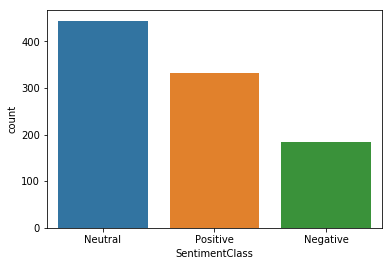

In [28]:
#What were the sentiments aroud the show?
sns.countplot(x='SentimentClass',data=data)

In [29]:
date_tweet_count=twdata['date'].value_counts()


In [31]:
def convert_index_column(df_tweet_count):
    index_list=np.array(df_tweet_count.index)
    tweets_list=[]
    for index,date_from_index  in enumerate (index_list):
        tweets_counts=df_tweet_count['date'][index]
        tweets_per_day={'date':date_from_index,'number_of_tweets':tweets_counts}
        tweets_list.append(tweets_per_day)
    return tweets_list

In [33]:
df_tweet_date_count=pd.DataFrame(data=date_tweet_count)
tweets_per_day=convert_index_column(df_tweet_date_count)
tweets_per_day_df=pd.DataFrame(tweets_per_day)


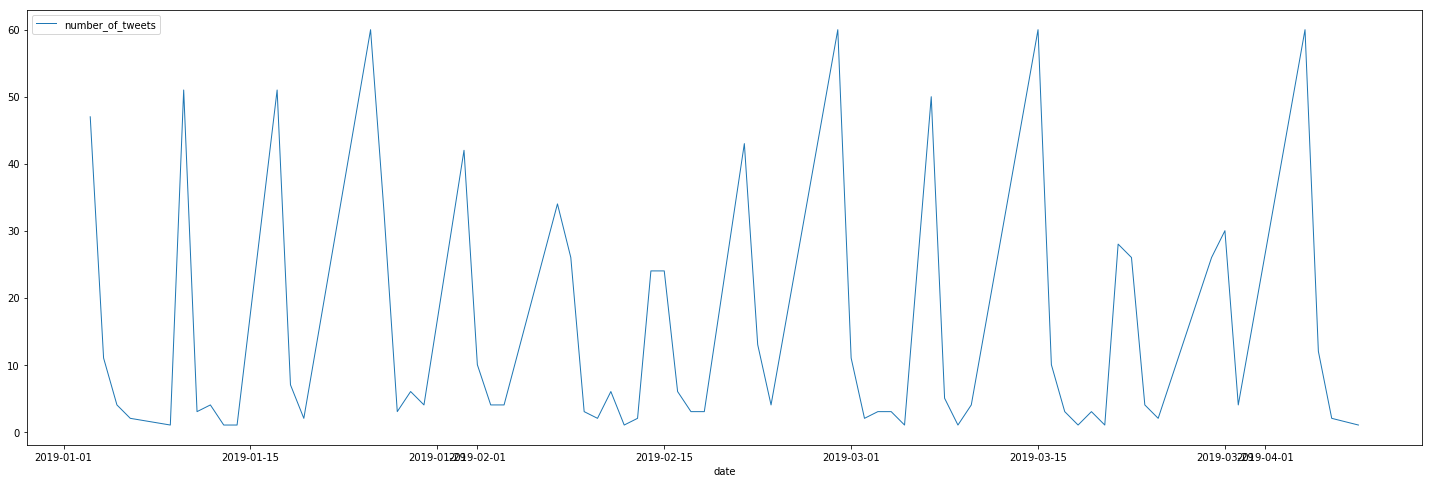

In [34]:
tweets_per_day_df.plot.line(x=tweets_per_day_df['date'],y='number_of_tweets',figsize=(25,8),lw=1)


In [35]:
hour_tweet_count=twdata['hour'].value_counts()
df_tweet_hour_count=pd.DataFrame(data=hour_tweet_count)

In [36]:
def convert_index_hour(df_tweet_count):
    index_list=np.array(df_tweet_count.index)
    tweets_list=[]
    for index,hour_from_index  in enumerate (index_list):
        tweets_counts=df_tweet_count['hour'][hour_from_index]
        hour=str(hour_from_index)+"hrs"
        tweets_per_hour={'hour':hour,'number_of_tweets':tweets_counts}
        tweets_list.append(tweets_per_hour)
    return tweets_list

In [37]:
tweets_per_hour=convert_index_hour(df_tweet_hour_count)
tweets_per_hour_df=pd.DataFrame(tweets_per_hour)
tweets_per_hour_df

,hour,number_of_tweets
0,20hrs,473
1,21hrs,88
2,16hrs,47
3,6hrs,42
4,5hrs,39
5,17hrs,31
6,15hrs,29
7,9hrs,25
8,7hrs,24
9,8hrs,20


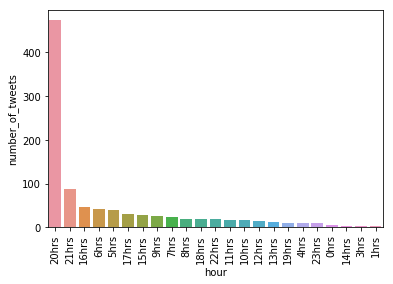

In [39]:
#Hour with the most tweets?
g=sns.barplot(x='hour',y='number_of_tweets',data=tweets_per_hour_df)
for item in g.get_xticklabels():
    item.set_rotation(90)

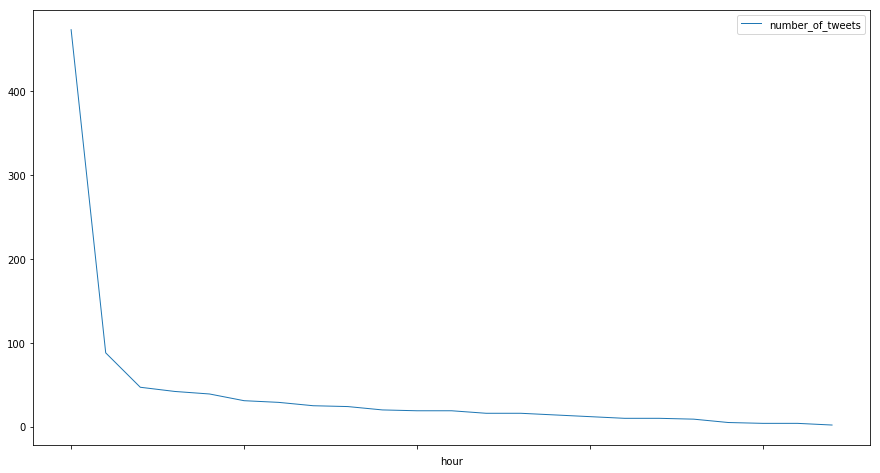

In [47]:
tweets_per_hour_df.plot.line(x='hour',y='number_of_tweets',figsize=(15,8),lw=1)